In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings("ignore")
%matplotlib inline
data = pd.read_csv("train.csv")
originalData = data

# EDA

### Data Visualization

In [31]:
#check if there are entries with null data attribtue
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [32]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


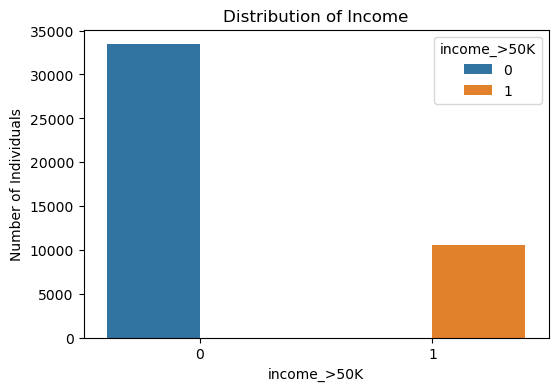

In [33]:
data['income_>50K'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.countplot(x='income_>50K', hue='income_>50K', data=data)
plt.title('Distribution of Income')
plt.ylabel('Number of Individuals')
plt.show()

<Axes: xlabel='income_>50K', ylabel='age'>

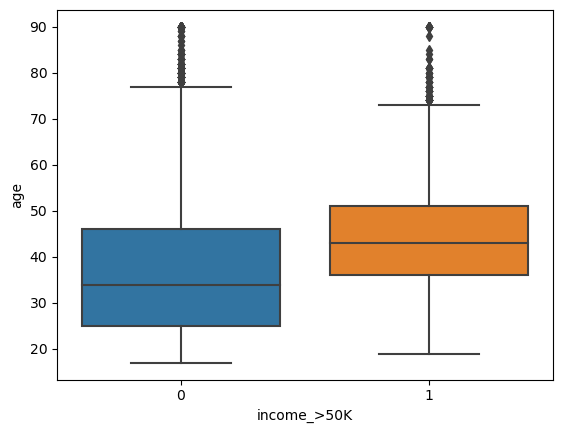

In [34]:
sns.boxplot(data = data, x='income_>50K', y='age')

<Axes: title={'center': 'Distribution of Income by Industry'}, xlabel='workclass', ylabel='count'>

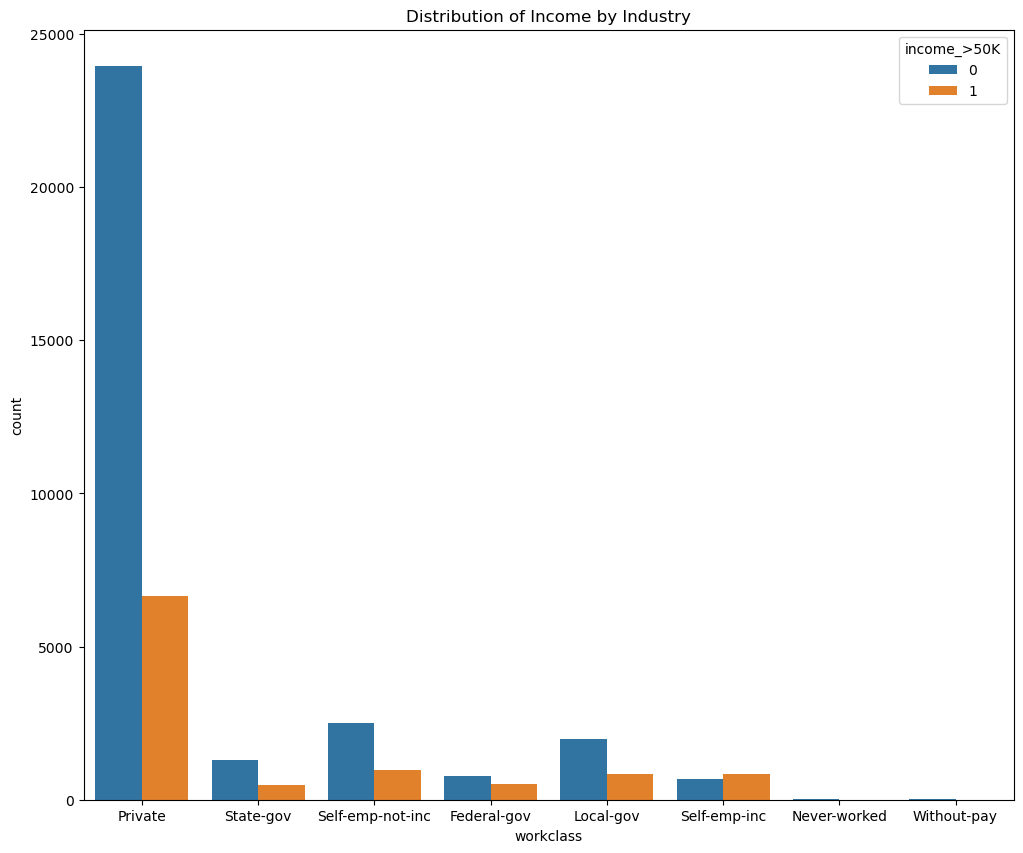

In [35]:
plt.figure(figsize=(12, 10))
plt.title('Distribution of Income by Industry')
plt.ylabel('Number of Individuals')
sns.countplot(x='workclass', hue='income_>50K', data=data)

<Axes: xlabel='race', ylabel='Count'>

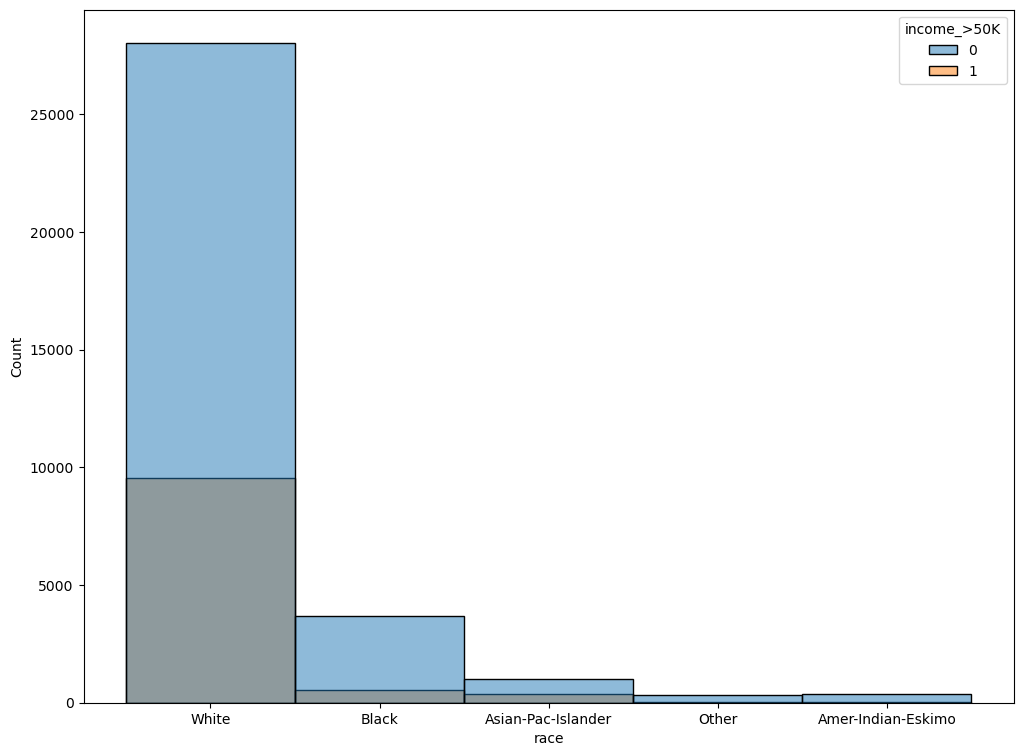

In [36]:
plt.figure(figsize=(12, 9))
sns.histplot(x=data['race'], hue=data['income_>50K'])

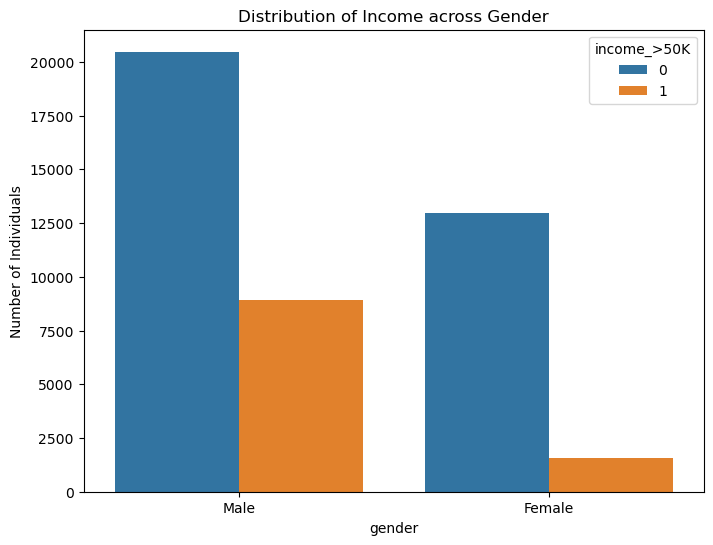

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income_>50K', data=data)
plt.title('Distribution of Income across Gender')
plt.ylabel('Number of Individuals')
plt.show()

<Axes: xlabel='education', ylabel='count'>

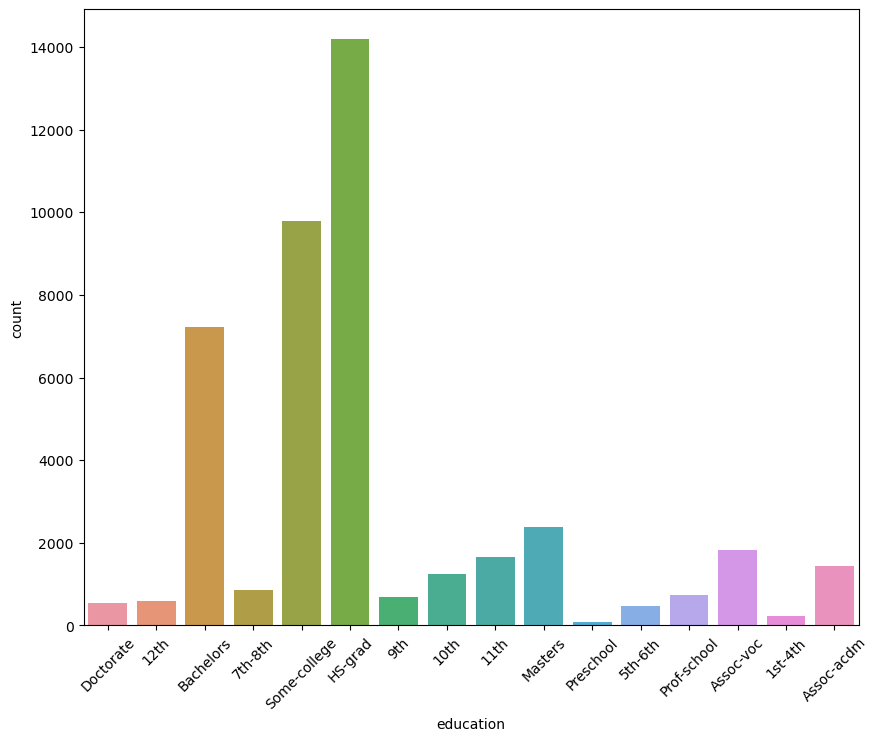

In [38]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.countplot(data=data, x = 'education')

<Axes: xlabel='occupation', ylabel='count'>

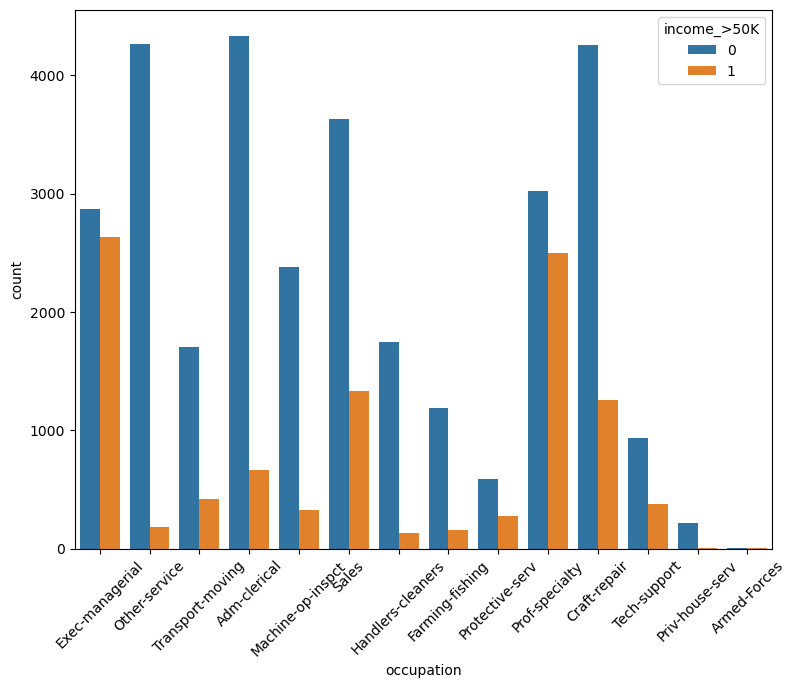

In [39]:
plt.figure(figsize=(9, 7))
plt.xticks(rotation=45)
sns.countplot(x='occupation', hue='income_>50K', data=data)

### visualize data corelation

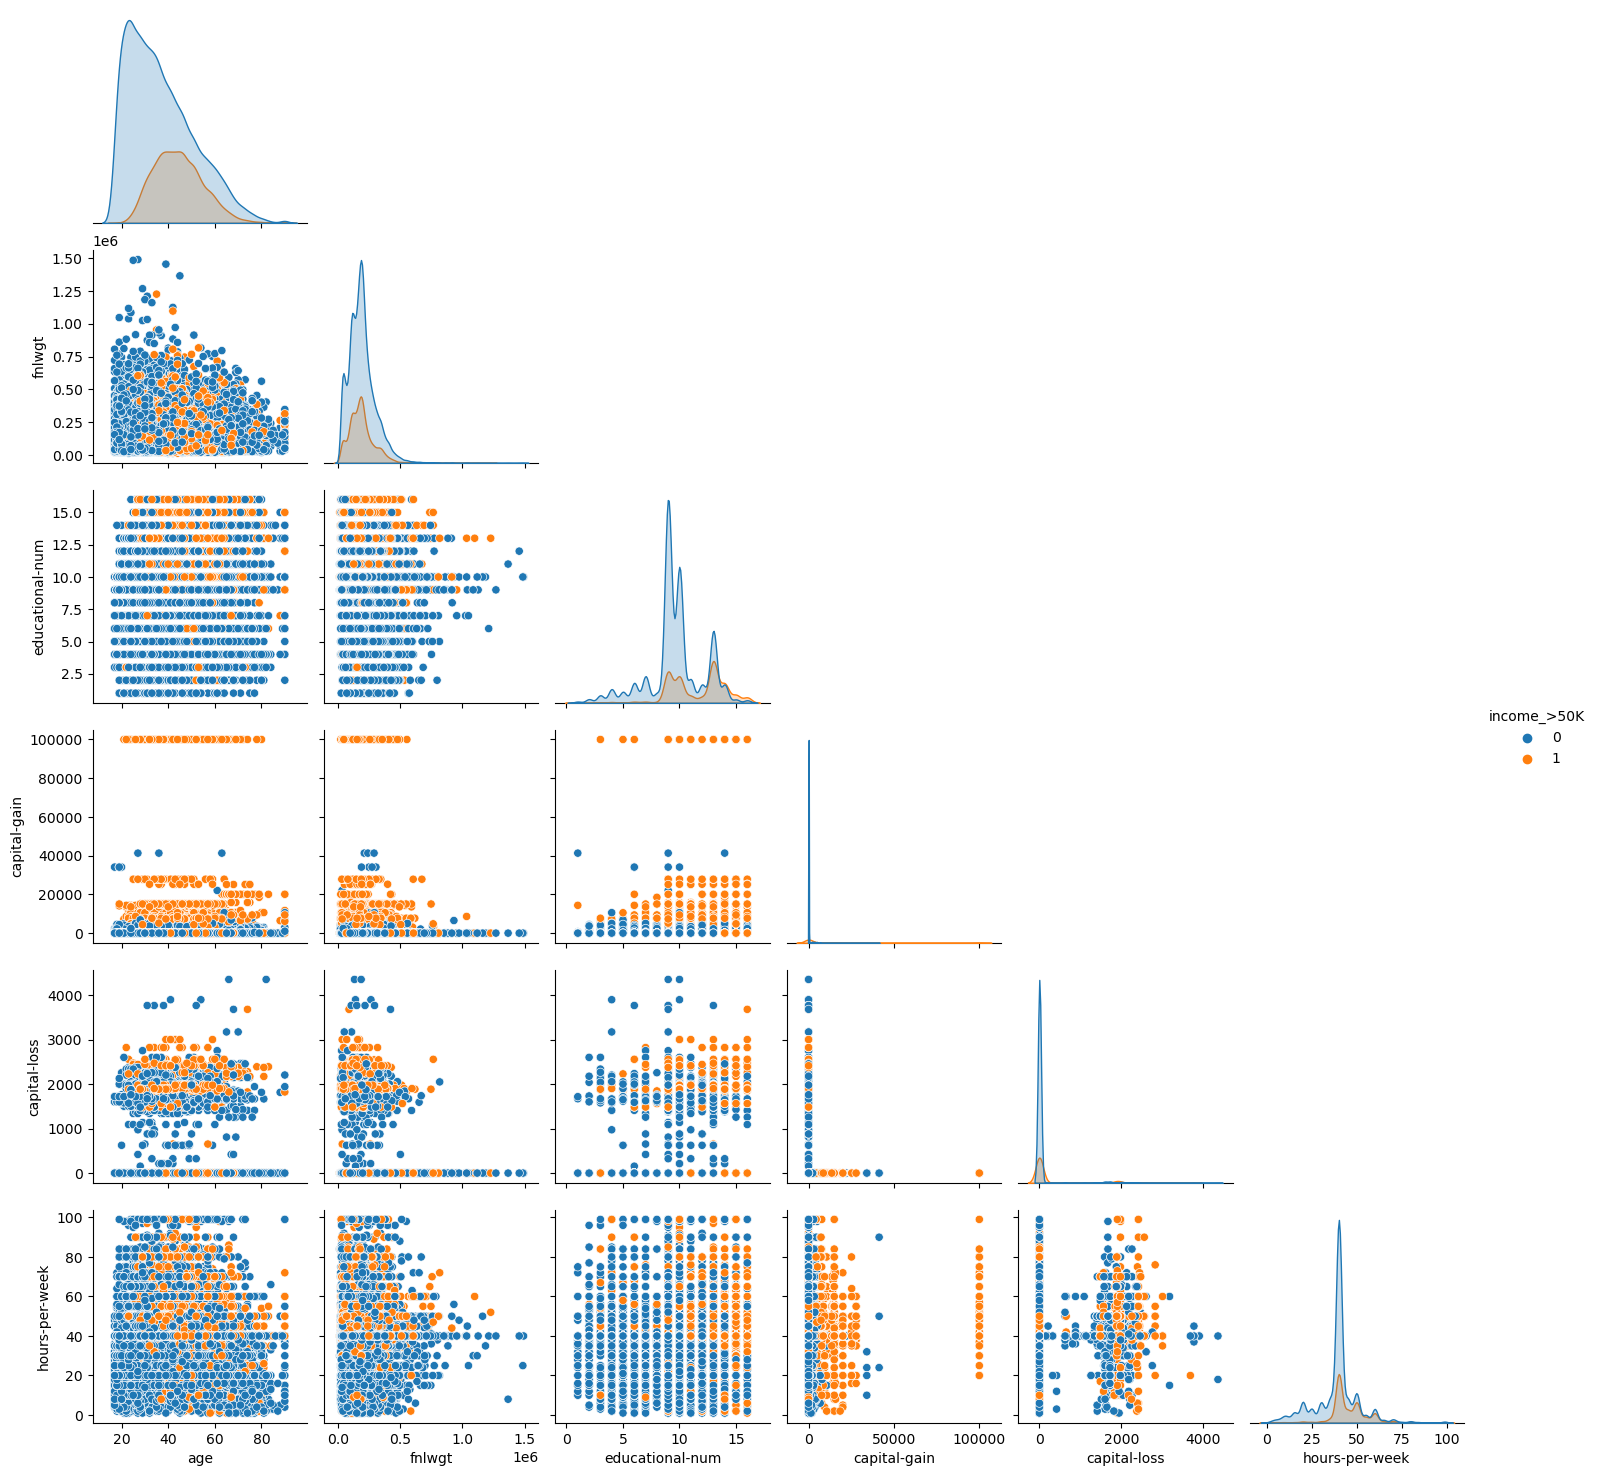

In [40]:
sns.pairplot(data,hue='income_>50K',corner=True)

<Axes: >

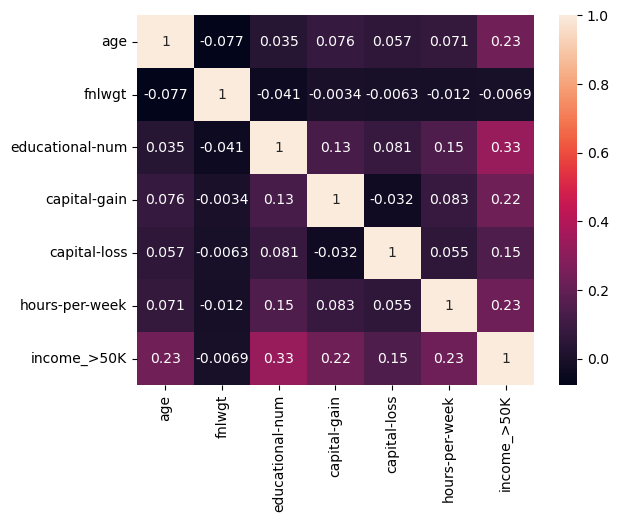

In [41]:
sns.heatmap(data.corr(numeric_only=True), annot = True)

([<matplotlib.patches.Wedge at 0x7f9fad4e8610>,
 [Text(-0.8035684096943551, 0.7511842722936133, '0'),
  Text(0.8035684800252987, -0.7511841970581059, '1')],
 [Text(-0.43831004165146636, 0.4097368757965163, '76.07%'),
  Text(0.4383100800137993, -0.40973683475896683, '23.93%')])

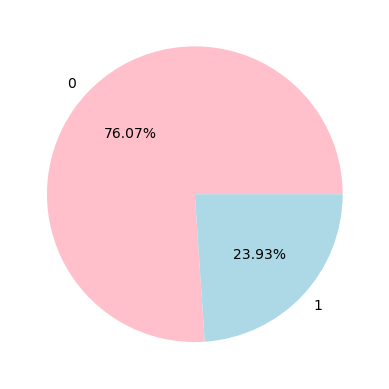

In [42]:
class_counts = data['income_>50K'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct= '%2.2f%%', colors=['pink', 'lightblue'])

### Data processing

In [43]:
data = pd.read_csv("train.csv")
data['income_>50K'].value_counts(normalize=True)

0    0.760721
1    0.239279
Name: income_>50K, dtype: float64

76% of the data is < 50k, there is a imbalance class problem where we should make the two side of of the sample equal before training

Split x and y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'South'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Ecuador'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Dominican-Republic'),
  Text(12, 0, 'Jamaica'),
  Text(13, 0, 'Vietnam'),
  Text(14, 0, 'Thailand'),
  Text(15, 0, 'Puerto-Rico'),
  Text(16, 0, 'Cuba'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Cambodia'),
  Text(19, 0, 'Yugoslavia'),
  Text(20, 0, 'Iran'),
  Text(21, 0, 'El-Salvador'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Ireland'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Guatemala'),
  Text(27, 0, 'Scotland'),
  Text(28, 0, 'Columbia'),
  Text(29, 0, 'Outlying-US(Guam-USVI-etc)'),
  

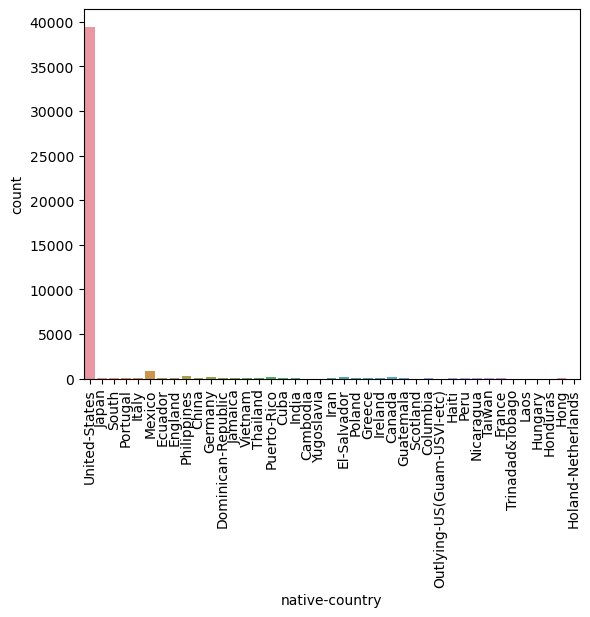

In [44]:
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

The data is mostly in United State, to be safe we can try to limit the model within the US.

In [45]:
data = data.copy().loc[(data['native-country'] == 'United-States'), :]
#Then we drop the country constrains
data.drop(columns=['native-country'],inplace=True)

In [46]:
# data = pd.get_dummies(data, columns = ['education', 'workclass','educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender'])
# print(data)
columns_to_encode = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(data[columns_to_encode])

pickle.dump(encoder, open('ohe.pkl','wb'))

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

Correcting imbalanced data

In [57]:
# Rebalancing data because there is a 75:25 ratio of < 50k and > 50k
# Using over sampling because under sampler reduces accuracy of random forest

ros = RandomOverSampler()
newX, newY = ros.fit_resample(df_encoded.drop("income_>50K",axis=1), df_encoded["income_>50K"])
x_train, x_test, y_train, y_test = train_test_split(newX, newY, test_size=0.2, random_state=20)

In [48]:
print(y_train.value_counts(normalize= False)) # counting how much data we are still using
y_train.value_counts(normalize=True)

1    23857
0    23803
Name: income_>50K, dtype: int64


1    0.500567
0    0.499433
Name: income_>50K, dtype: float64

In [49]:
print(y_train)

53918    1
28032    0
1338     1
51325    1
50689    1
        ..
23452    0
23775    0
37135    0
27098    0
48483    1
Name: income_>50K, Length: 47660, dtype: int64


Rescale beccause the data is distribution is skewed

In [58]:
#scale the data, need to do after encoding
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

pickle.dump(scaler, open('scaler.pkl','wb'))

print(x_test)
scaled_x_test = scaler.transform(x_test)
print(scaled_x_test)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
13337   47  262244               13             0             0   
17026   29  194200               10             0             0   
24387   60  225014                9             0             0   
59359   38  193815               14             0             0   
1664    36  206951               10             0             0   
...    ...     ...              ...           ...           ...   
53829   49  340755               14          5178             0   
33021   47   80451                4             0             0   
55380   43  147110               10             0             0   
1871    35  420040                9             0             0   
23908   18  142647               10             0             0   

       hours-per-week  education_11th  education_12th  education_1st-4th  \
13337              60             0.0             0.0                0.0   
17026              45             0.0      

### Logistic Regression

In [51]:
logistic = LogisticRegression(max_iter=1000)

logistic.fit(scaled_x_train, y_train)

pickle.dump(logistic, open('model.pkl','wb'))

pred = logistic.predict(scaled_x_test)

accuracy = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)

accuracy

0.819402484055052

### Neural Network

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#df = pd.get_dummies(originalData, columns = ['education', 'workclass','educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'])
#X = df.drop("income_>50K",axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled_nn = scaler.fit_transform(x_train)
X_nn = pd.DataFrame(data = X_rescaled_nn, columns = x_train.columns)
y_nn = pd.get_dummies(y_train)

data_train, data_test, class_train, class_test = train_test_split(X_nn, y_nn, test_size=0.1)
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8250104909777591
Mean Square Error :  0.17498950902224086
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Confusion Matrix for each label : 
[[[2062  299]
  [ 535 1870]]

 [[1870  535]
  [ 299 2062]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2405
           1       0.79      0.87      0.83      2361

   micro avg       0.83      0.83      0.83      4766
   macro avg       0.83      0.83      0.82      4766
weighted avg       0.83      0.83      0.82      4766
 samples avg       0.83      0.83      0.83      4766



### Hyperparameter Tuning for Neural Network

In [54]:
'''
max_iterations = [500,800,1000]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10)]
learning_rates = 0.15 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)
grid.fit(X_nn, y_nn)
'''

'\nmax_iterations = [500,800,1000]\nhidden_layer_siz = [(5, 7), (7, 13), (13, 10)]\nlearning_rates = 0.15 * np.arange(1, 3)\n\nparam_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)\n\ngrid = GridSearchCV(estimator = mlp, param_grid = param_grid)\ngrid.fit(X_nn, y_nn)\n'

In [55]:
'''
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)
'''

'\nprint("Optimal Hyper-parameters : ", grid.best_params_)\nprint("Optimal Accuracy : ", grid.best_score_)\n'

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier  
RFC = RandomForestClassifier(n_estimators=100, max_features=3)  
RFC.fit(x_train, y_train) 

pred2 = RFC.predict(x_test)
accuracy = accuracy_score(y_test, pred2)
print(accuracy)

0.9253944276602887
